In [2]:
#libraries
import cv2
import dlib
from google.colab.patches import cv2_imshow #habilitando o imshow no colab

In [23]:
#loading image
image = cv2.imread('people2.jpg')
image.shape

(537, 1023, 3)

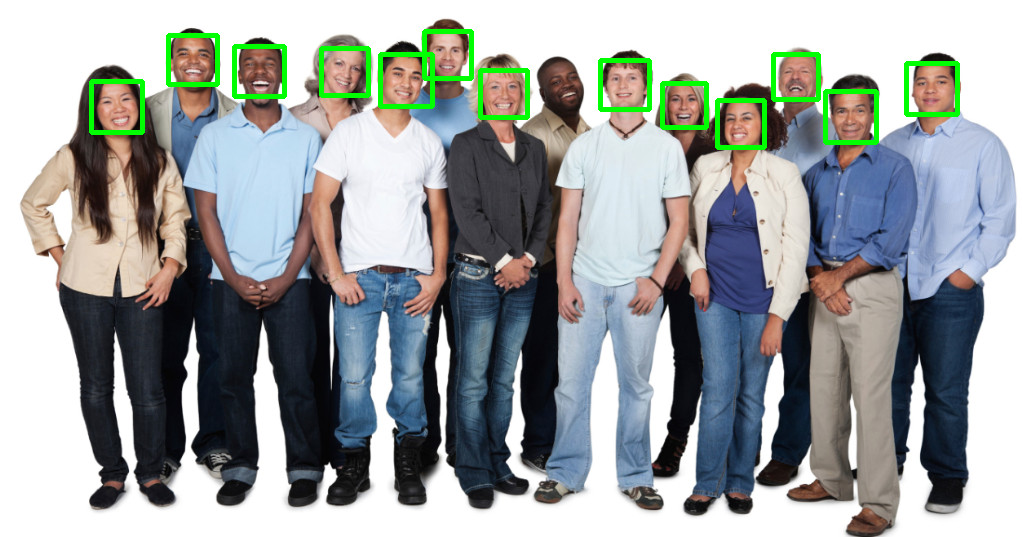

In [25]:
#Haarcascade Classifier
image = cv2.imread('people2.jpg')
image_HC = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detector_HC = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
detections_HC = detector_HC.detectMultiScale(image_HC, scaleFactor=1.2, minNeighbors=3, minSize=(32,32), maxSize=(100,100))
for (x, y, w, h) in detections_HC:
  cv2.rectangle( image, (x,y), (x + w, y + h), (0,255,0), 4)
cv2_imshow(image)

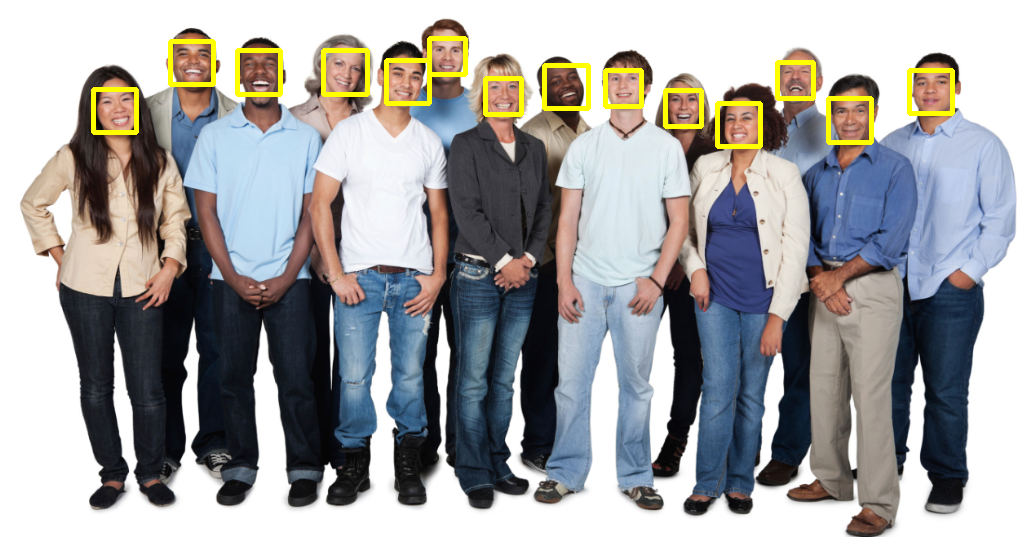

In [26]:
#HOG Classifier
image = cv2.imread('people2.jpg')
detector_HOG = dlib.get_frontal_face_detector()
detections_HOG = detector_HOG(image, 1)
for face in detections_HOG:
  x, y, w, h = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (x,y), (w,h), (0,255,255), 4)
cv2_imshow(image)

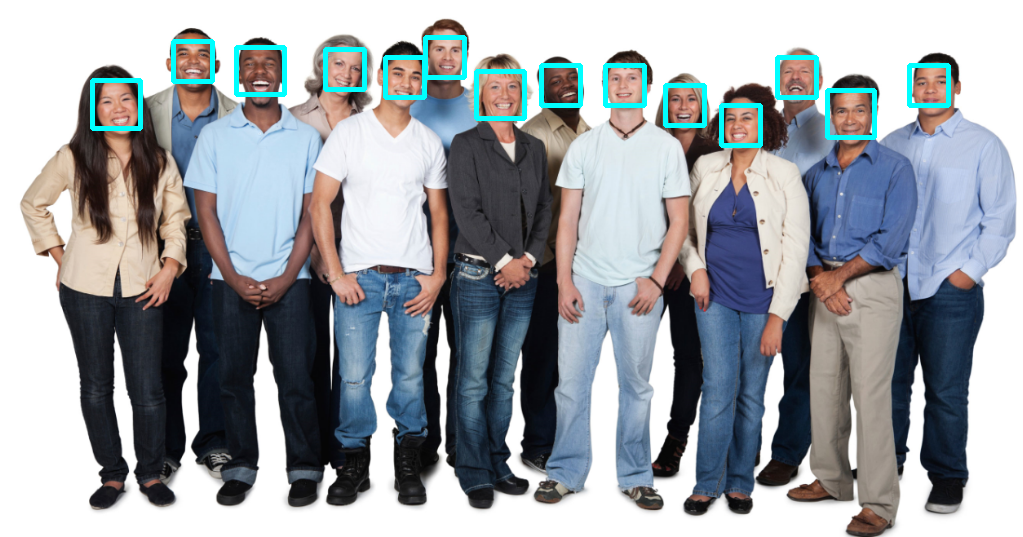

In [30]:
#CNN Classifier
image = cv2.imread('people2.jpg')
detector_CNN = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
detections_CNN = detector_CNN(image, 1)
for face in detections_CNN:
  x = face.rect.left()
  y = face.rect.top()
  w = face.rect.right()
  h = face.rect.bottom()
  c = face.confidence
  cv2.rectangle(image, (x,y), (w,h), (255,255,0), 4)
cv2_imshow(image)